#### Pandas Part 91: Advanced Plotting Functions

This notebook explores the advanced plotting functions available in the pandas.plotting module. These functions provide specialized visualizations beyond the basic plot types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves, autocorrelation_plot, bootstrap_plot, \
                           lag_plot, parallel_coordinates, radviz, scatter_matrix

# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

##### 1. Creating Sample Data for Visualization

In [2]:
# Create a time series dataset
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=200)
ts = pd.Series(np.cumsum(np.random.randn(200)), index=dates)

# Create a multivariate dataset (similar to iris dataset)
n_samples = 50
# Create three clusters of points
group1 = np.random.randn(n_samples, 4) * 0.5 + np.array([2, 2, 2, 2])
group2 = np.random.randn(n_samples, 4) * 0.5 + np.array([6, 0, 6, 0])
group3 = np.random.randn(n_samples, 4) * 0.5 + np.array([4, 4, 0, 4])

# Combine the clusters and create a DataFrame
data = np.vstack([group1, group2, group3])
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df['Class'] = ['Group1'] * n_samples + ['Group2'] * n_samples + ['Group3'] * n_samples

# Display the first few rows of the multivariate dataset
print("Multivariate Dataset:")
display(df.head())

# Display the time series dataset
print("\nTime Series Dataset:")
display(ts.head())

Multivariate Dataset:


,Feature1,Feature2,Feature3,Feature4,Class
0,2.178894,2.280392,2.541526,2.526901,Group1
1,1.311165,1.531087,2.257518,2.256893,Group1
2,2.257524,3.926366,2.285445,2.567783,Group1
3,2.477001,2.325696,1.842365,2.379485,Group1
4,1.613587,1.881591,1.757318,2.040937,Group1



Time Series Dataset:


2023-01-01    0.496714
2023-01-02    0.358450
2023-01-03    1.006138
2023-01-04    2.529168
2023-01-05    2.295015
Freq: D, dtype: float64

##### 2. Andrews Curves

Andrews curves are a way to visualize multidimensional data by mapping each observation to a curve. Each dimension contributes to the shape of the curve, making it easier to identify clusters and patterns.

The function signature is:
```python
pandas.plotting.andrews_curves(frame, class_column, ax=None, samples=200, color=None, colormap=None, **kwargs)
```

Andrews curves have the functional form:
f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) + x_4 sin(2t) + x_5 cos(2t) + ...

Where x coefficients correspond to the values of each dimension and t is linearly spaced between -pi and +pi. Each row of the DataFrame corresponds to a single curve.

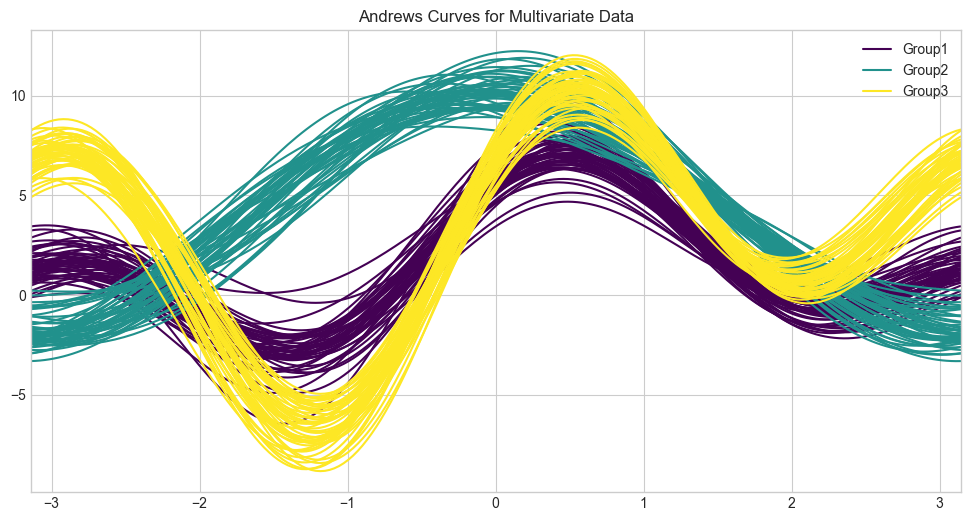

In [3]:
plt.figure(figsize=(12, 6))
andrews_curves(df, 'Class', colormap='viridis')
plt.title('Andrews Curves for Multivariate Data')
plt.grid(True)
plt.show()

##### 3. Autocorrelation Plot

Autocorrelation plots are useful for checking randomness in time series data. This plot shows the correlation between a time series and its lagged versions.

The function signature is:
```python
pandas.plotting.autocorrelation_plot(series, ax=None, **kwargs)
```

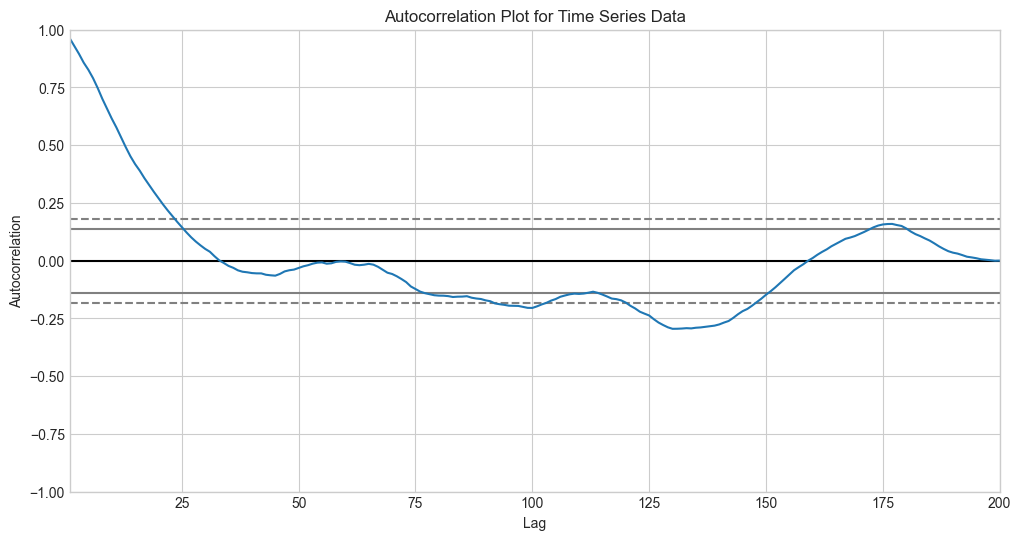

In [4]:
plt.figure(figsize=(12, 6))
autocorrelation_plot(ts)
plt.title('Autocorrelation Plot for Time Series Data')
plt.grid(True)
plt.show()

##### 4. Bootstrap Plot

Bootstrap plots help estimate the uncertainty of a statistic by relying on random sampling with replacement. This function generates bootstrapping plots for mean, median, and mid-range statistics.

The function signature is:
```python
pandas.plotting.bootstrap_plot(series, fig=None, size=50, samples=500, **kwds)
```

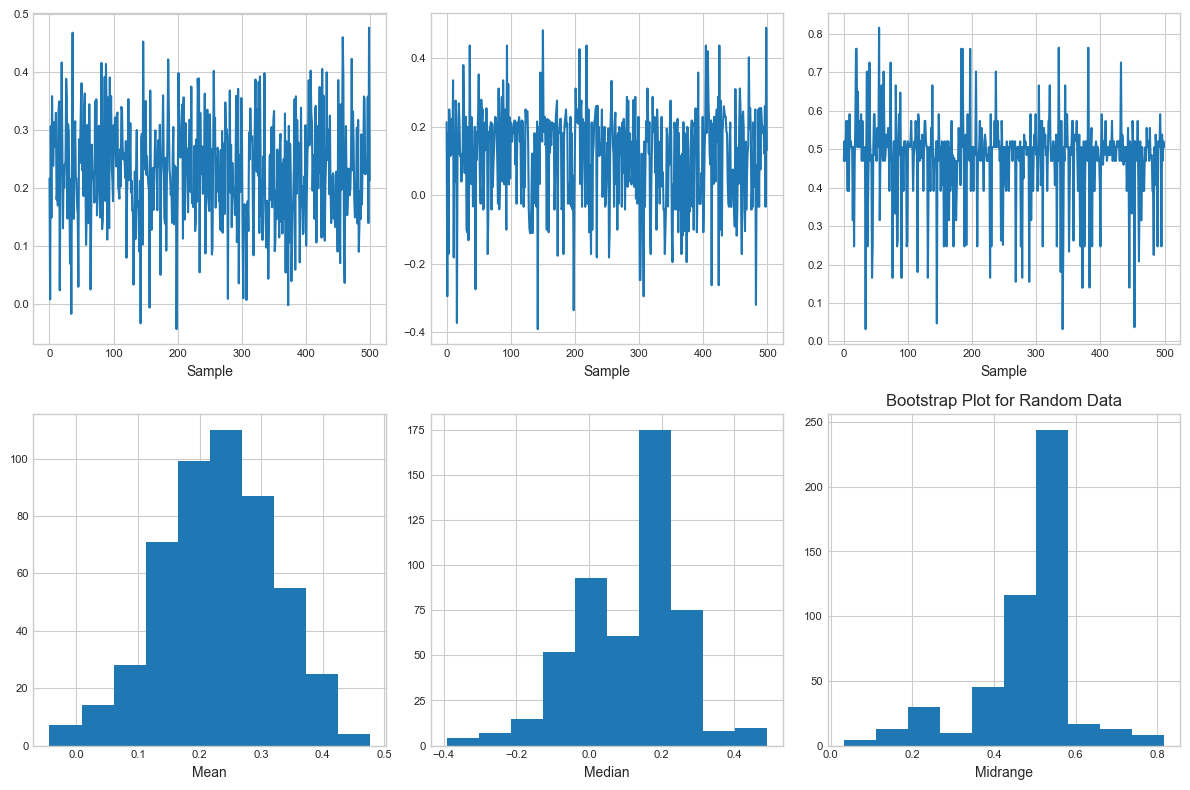

In [5]:
# Create a series for bootstrap plot
bootstrap_series = pd.Series(np.random.normal(size=100))

# Generate bootstrap plot
fig = bootstrap_plot(bootstrap_series, size=50, samples=500)
plt.title('Bootstrap Plot for Random Data')
plt.tight_layout()
plt.show()

##### 5. Box Plot

Box plots (or box-and-whisker plots) show the distribution of data based on a five-number summary: minimum, first quartile, median, third quartile, and maximum.

The function signature is:
```python
pandas.plotting.boxplot(data, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwargs)
```

<Figure size 1200x600 with 0 Axes>

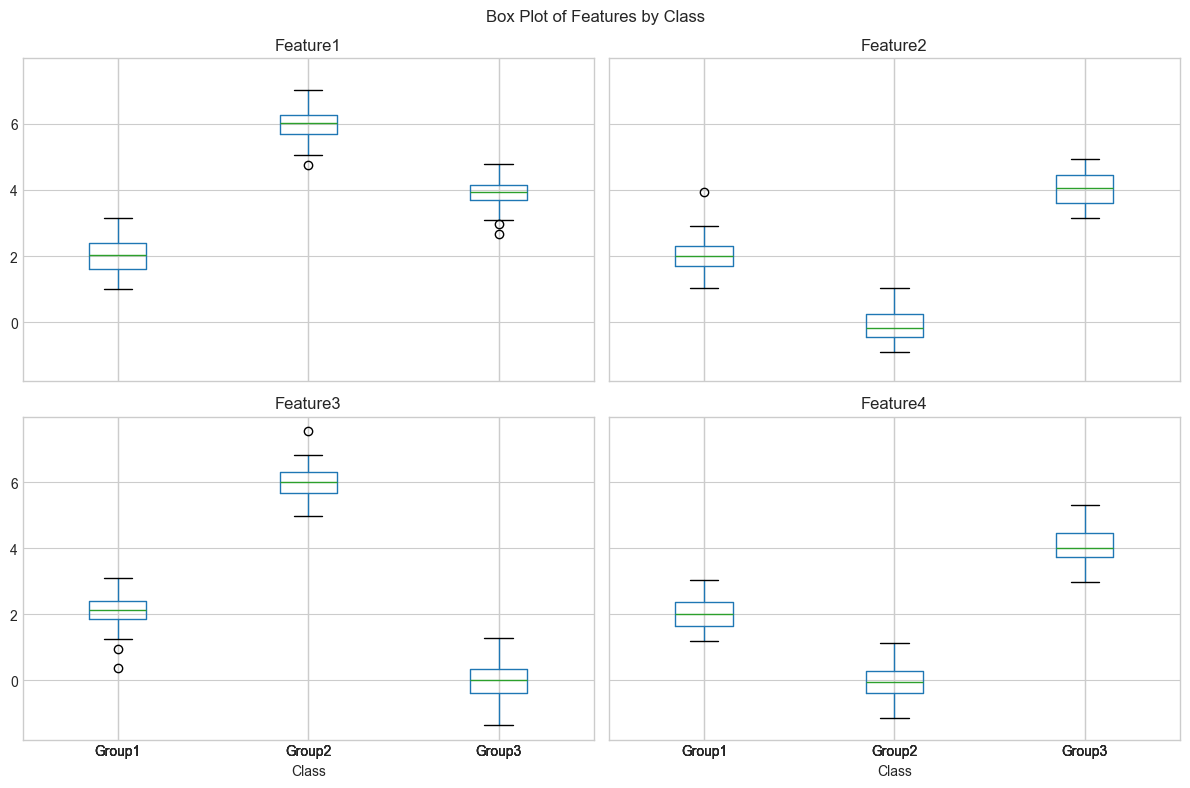

In [6]:
# Create a box plot
plt.figure(figsize=(12, 6))
pd.plotting.boxplot(df, column=['Feature1', 'Feature2', 'Feature3', 'Feature4'], by='Class', grid=True)
plt.suptitle('Box Plot of Features by Class')
plt.tight_layout()
plt.show()

##### 6. Lag Plot

Lag plots help visualize the relationship between a time series and its lagged version. It's useful for checking randomness and identifying patterns in time series data.

The function signature is:
```python
pandas.plotting.lag_plot(series, lag=1, ax=None, **kwds)
```

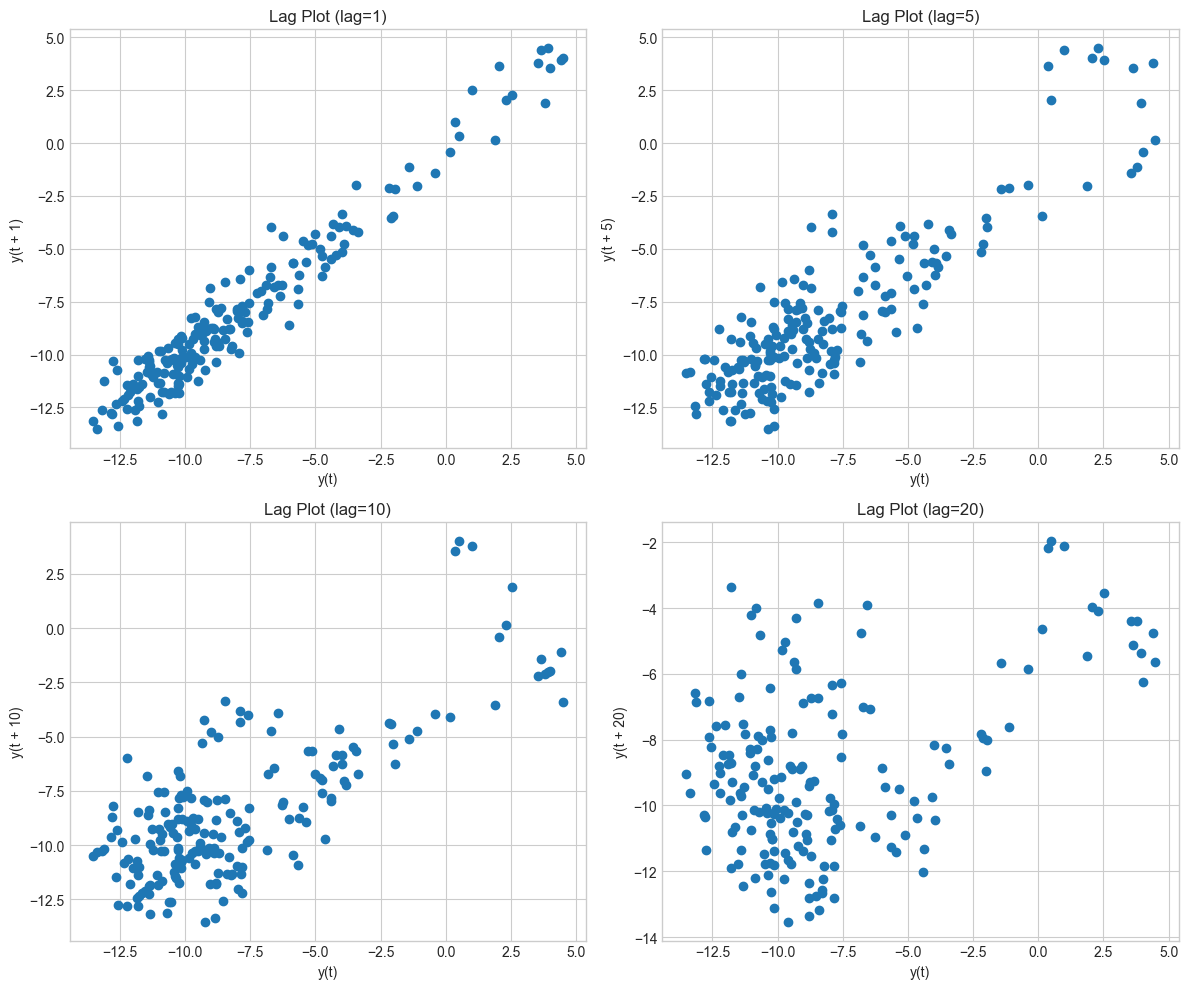

In [7]:
plt.figure(figsize=(12, 10))

# Create lag plots with different lag values
plt.subplot(221)
lag_plot(ts, lag=1)
plt.title('Lag Plot (lag=1)')

plt.subplot(222)
lag_plot(ts, lag=5)
plt.title('Lag Plot (lag=5)')

plt.subplot(223)
lag_plot(ts, lag=10)
plt.title('Lag Plot (lag=10)')

plt.subplot(224)
lag_plot(ts, lag=20)
plt.title('Lag Plot (lag=20)')

plt.tight_layout()
plt.show()

##### 7. Parallel Coordinates

Parallel coordinates plots are a way to visualize high-dimensional data. Each vertical line represents a dimension, and each data point is represented as a line connecting its values across all dimensions.

The function signature is:
```python
pandas.plotting.parallel_coordinates(frame, class_column, ax=None, color=None, colormap=None, **kwds)
```

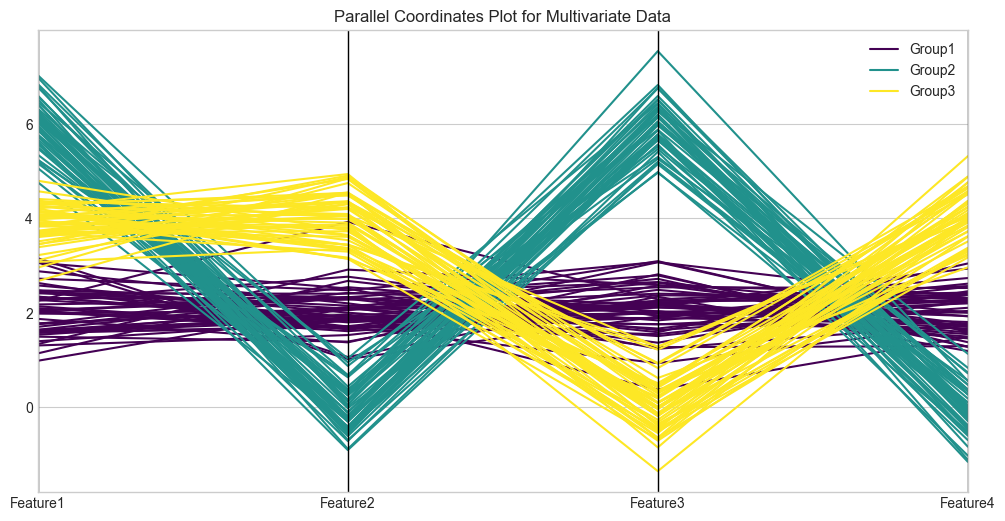

In [8]:
plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'Class', colormap='viridis')
plt.title('Parallel Coordinates Plot for Multivariate Data')
plt.grid(True)
plt.show()

##### 8. Radviz

Radviz is a way to visualize multi-dimensional data in a 2D plot. Each dimension is represented as an anchor point on the perimeter of a circle, and data points are shown as points inside the circle.

The function signature is:
```python
pandas.plotting.radviz(frame, class_column, ax=None, color=None, colormap=None, **kwds)
```

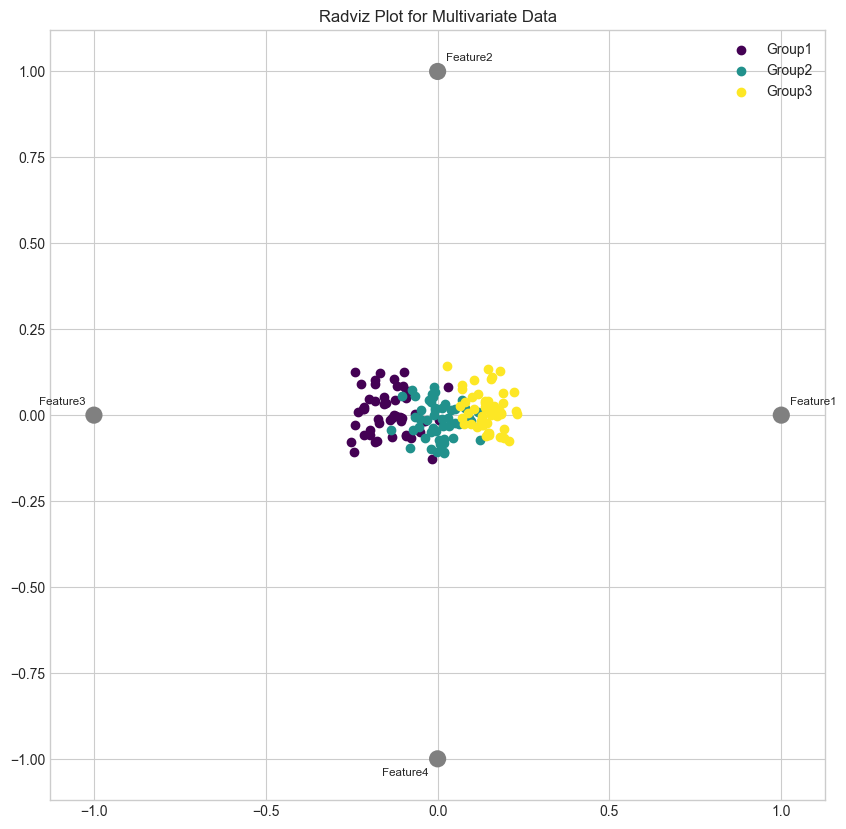

In [9]:
plt.figure(figsize=(10, 10))
radviz(df, 'Class', colormap='viridis')
plt.title('Radviz Plot for Multivariate Data')
plt.grid(True)
plt.show()

##### 9. Scatter Matrix

Scatter matrix (or pair plot) creates a matrix of scatter plots for all pairs of variables in a DataFrame. The diagonal can show histograms or kernel density estimates of each variable.

The function signature is:
```python
pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)
```

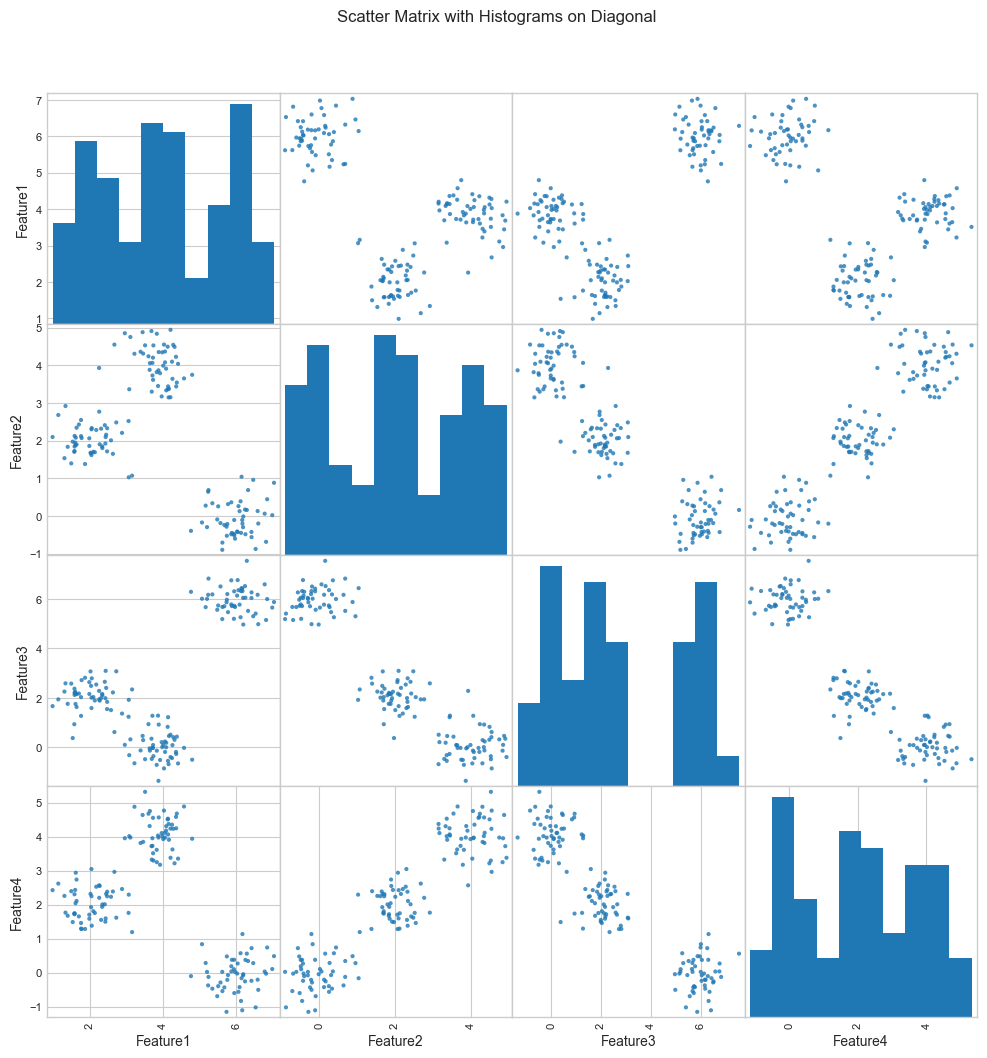

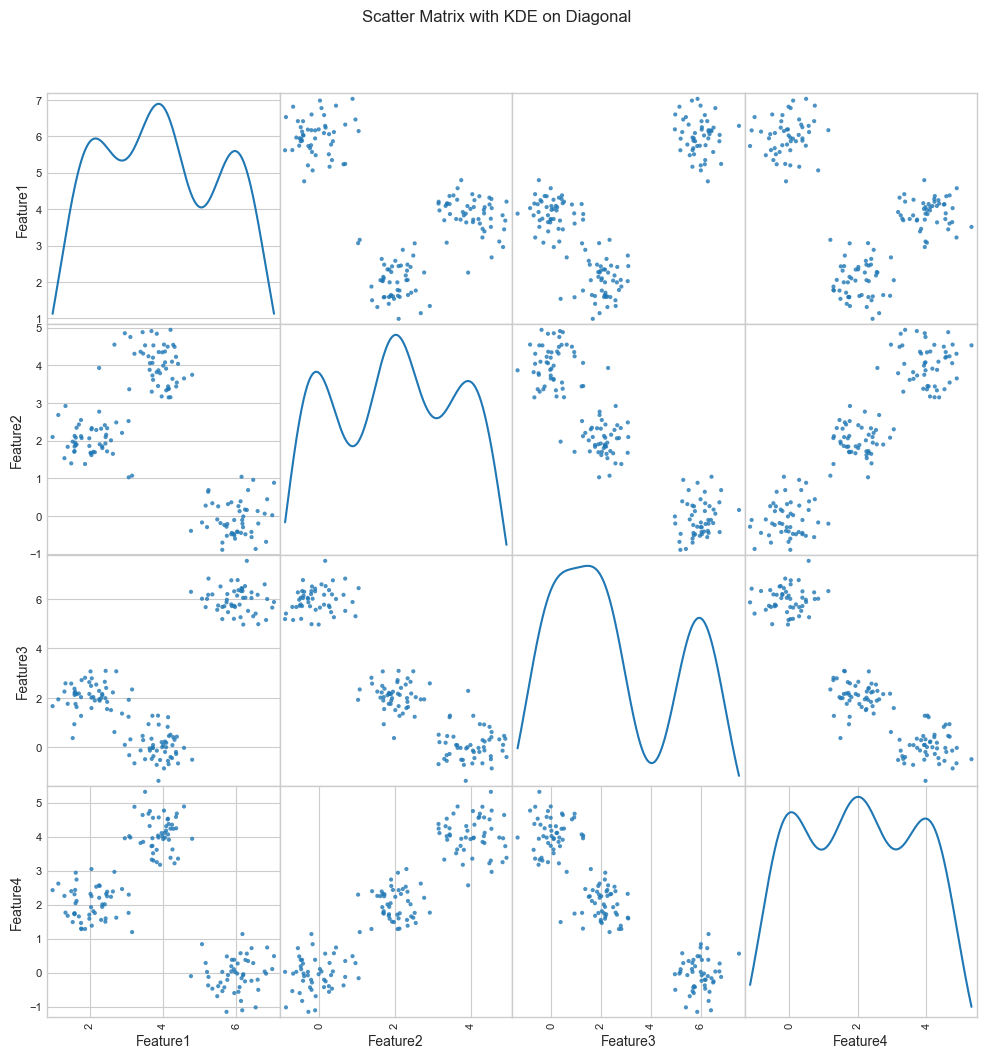

In [10]:
# Create a scatter matrix with histograms on the diagonal
scatter_matrix(df.drop('Class', axis=1), alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix with Histograms on Diagonal', y=0.95)
plt.show()

# Create a scatter matrix with kernel density estimates on the diagonal
scatter_matrix(df.drop('Class', axis=1), alpha=0.8, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix with KDE on Diagonal', y=0.95)
plt.show()

##### 10. Matplotlib Converters

Pandas provides functions to register and deregister its formatters and converters with matplotlib. This is useful when working with date and time data.

The functions are:
```python
pandas.plotting.register_matplotlib_converters()
pandas.plotting.deregister_matplotlib_converters()
```

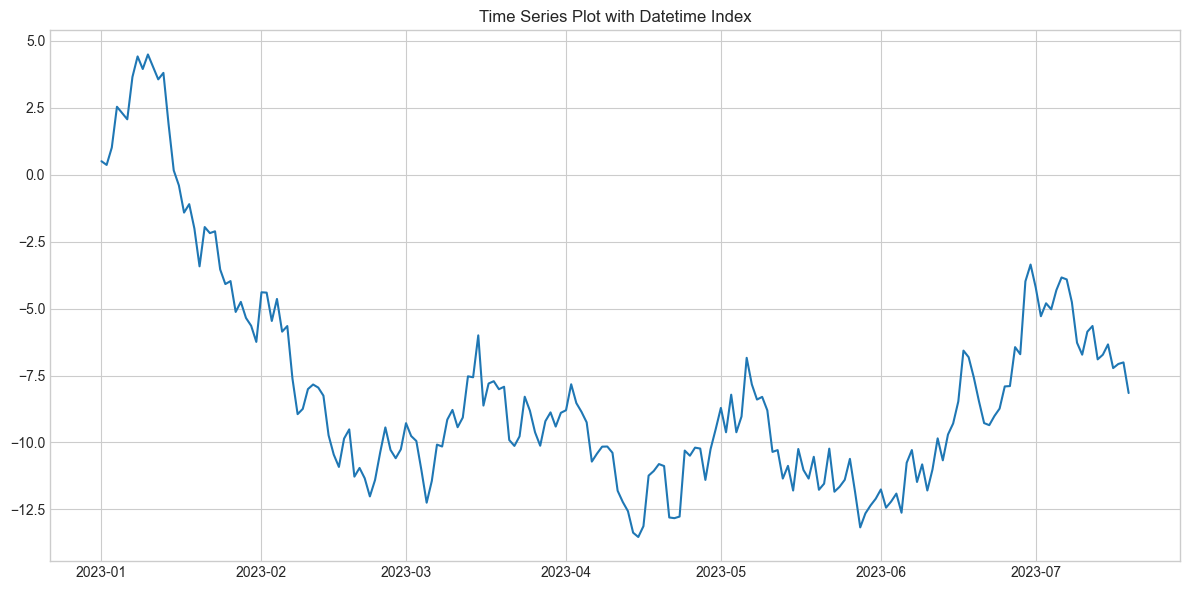

In [11]:
# Register pandas formatters and converters with matplotlib
pd.plotting.register_matplotlib_converters()

# Create a plot with datetime index
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values)
plt.title('Time Series Plot with Datetime Index')
plt.grid(True)
plt.tight_layout()
plt.show()

# Deregister pandas formatters and converters
# Note: In most cases, you don't need to deregister them
# pd.plotting.deregister_matplotlib_converters()

##### 11. Table Visualization

The `table` function helps convert DataFrame and Series to matplotlib tables.

The function signature is:
```python
pandas.plotting.table(ax, data, rowLabels=None, colLabels=None, **kwargs)
```

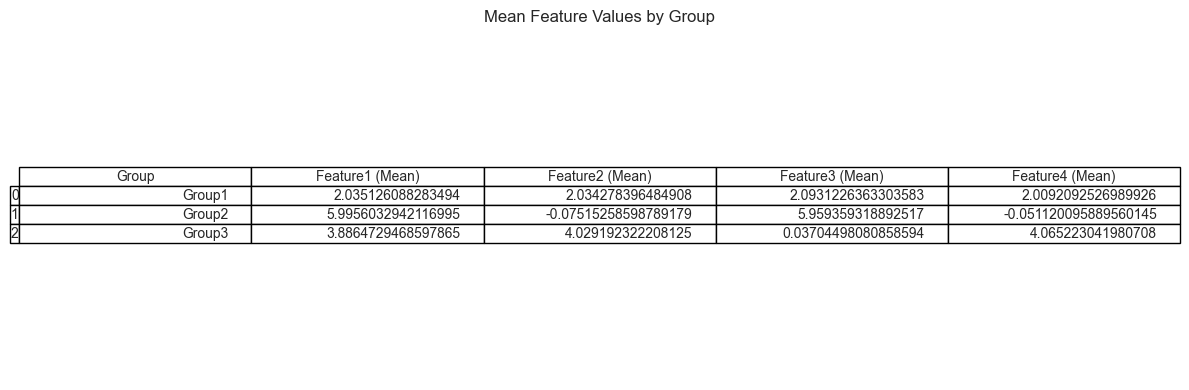

In [12]:
# Create a sample DataFrame for the table
table_data = pd.DataFrame({
    'Group': ['Group1', 'Group2', 'Group3'],
    'Feature1 (Mean)': df.groupby('Class')['Feature1'].mean().values,
    'Feature2 (Mean)': df.groupby('Class')['Feature2'].mean().values,
    'Feature3 (Mean)': df.groupby('Class')['Feature3'].mean().values,
    'Feature4 (Mean)': df.groupby('Class')['Feature4'].mean().values
})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
ax.axis('tight')

# Create a table
pd.plotting.table(ax, table_data, loc='center')

# Add a title
plt.title('Mean Feature Values by Group')
plt.tight_layout()
plt.show()

##### 12. Conclusion

In this notebook, we've explored various advanced plotting functions available in the pandas.plotting module:

1. **Andrews Curves**: For visualizing multidimensional data by mapping each observation to a curve
2. **Autocorrelation Plot**: For checking randomness in time series data
3. **Bootstrap Plot**: For estimating uncertainty of statistics using random sampling with replacement
4. **Box Plot**: For showing the distribution of data based on a five-number summary
5. **Lag Plot**: For visualizing the relationship between a time series and its lagged version
6. **Parallel Coordinates**: For visualizing high-dimensional data
7. **Radviz**: For visualizing multi-dimensional data in a 2D plot
8. **Scatter Matrix**: For creating a matrix of scatter plots for all pairs of variables
9. **Matplotlib Converters**: For registering and deregistering pandas formatters and converters with matplotlib
10. **Table Visualization**: For converting DataFrame and Series to matplotlib tables

These advanced plotting functions are powerful tools for data visualization and analysis, especially when working with complex datasets.